In [ ]:
# build by Hassan Murtaza
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [ ]:
from google.colab import files
upload = files.upload()

Saving Data2021.csv to Data2021.csv


In [ ]:
df = pd.read_csv("Data2021.csv")

In [ ]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [ ]:
df = df.dropna(how="any")

In [ ]:
X = df.drop(["Class","Artist Name","Track Name"], axis=1, inplace=False)
y = df.loc[:,['Class']]

In [ ]:
X.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4


In [ ]:
print("Number of unique Classes",y.nunique())

Number of unique Classes Class    11
dtype: int64


In [ ]:
assert X.shape[0] == y.shape[0]
print(" Dimensions of X",X.shape)
print(" Dimwnsions of y",y.shape)

 Dimensions of X (11813, 14)
 Dimwnsions of y (11813, 1)


Lets plot how many examples each class have.

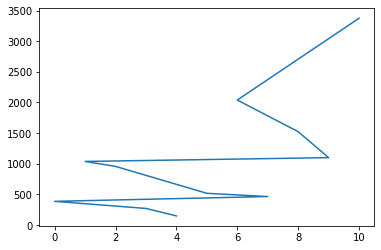

In [ ]:
plt.plot(df['Class'].value_counts())

In [ ]:
df['Class'].value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

Text(0.5, 1.0, 'Label Distribution')

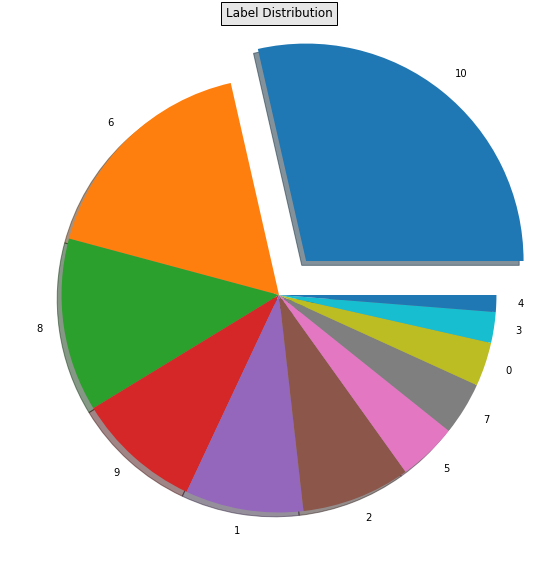

In [ ]:
myLabels = df['Class'].value_counts().index
fig, ax = plt.subplots(figsize =(10, 10))
explod = (0.2,0,0,0,0,0,0,0,0,0,0)
ax.pie(df['Class'].value_counts(), labels=myLabels, explode=explod, shadow=True)
plt.title("Label Distribution",bbox={'facecolor':'0.9', 'pad':5,})

It can be seen that given dataset is imbalanced

The solution to tackle this situation are given below.
 

1.   smote(Synthetic Minority Oversampling Technique)
2.   ensemble



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


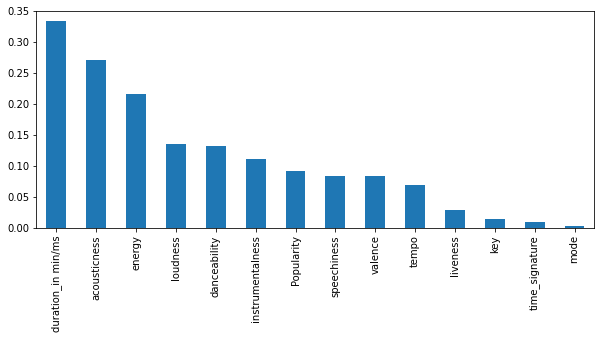

In [ ]:
mi = mutual_info_classif(X, y)
mi = pd.Series(mi)
mi.index = X.columns
# mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

# Select Best K columns
# You can specify number of features you want
feature_cols = SelectKBest(mutual_info_classif, k= 7).fit_transform(X, y)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
# X_train = df[feature_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_cols, y ,random_state=3,test_size=0.2)

print(X_train.shape, X_test.shape)


(9450, 7) (2363, 7)


In [ ]:
# !pip install tensorflow_addons
# from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from keras import layers 
from sklearn.metrics import confusion_matrix, classification_report
from keras import regularizers
from keras.regularizers import Regularizer

In [ ]:

def model_creation(inputsize):
  model1 = keras.Sequential()
  model1.add(keras.layers.InputLayer(input_shape=(inputsize,)))
  model1.add(layers.Dense(16, activation='relu'))
  model1.add(layers.Dense(32, activation='relu'))
  model1.add(layers.Dense(64, activation='relu'))
  model1.add(layers.Dense(128, activation='relu'))
  model1.add(layers.Dense(256, activation='relu'))
  model1.add(layers.Dense(512, activation='relu'))
  model1.add(layers.Dense(256, activation='relu'))
  model1.add(layers.Dense(128, activation='relu'))
  model1.add(layers.Dense(64, activation='relu'))
  # kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)
  model1.add(layers.Dense(32, activation='relu'))
  model1.add(layers.Dense(16, activation='softmax'))
  return model1

#print(model1.summary())


In [ ]:
#!pip install keras-tuner

In [ ]:
from sklearn.preprocessing import RobustScaler


clf = RobustScaler()
X_train = clf.fit_transform(X_train)
X_test = clf.fit_transform(X_test)

print(X_train.shape, X_test.shape)


(9450, 7) (2363, 7)


In [ ]:
model1 = model_creation(X_train.shape[1])
n_rows = X_train.shape[0]
batchsize = 32 # 9450 / 90 =  105 batches
epoch = 200

In [ ]:

model1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    metrics = ['accuracy']
)


history1 = model1.fit(X_train, y_train, batch_size=batchsize, epochs=epoch, verbose=2,validation_split=0.20)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


237/237 - 5s - loss: 2.7247 - accuracy: 0.1672 - val_loss: 2.6614 - val_accuracy: 0.1757 - 5s/epoch - 20ms/step
Epoch 2/200
237/237 - 2s - loss: 2.5526 - accuracy: 0.1771 - val_loss: 2.4180 - val_accuracy: 0.2905 - 2s/epoch - 9ms/step
Epoch 3/200
237/237 - 2s - loss: 2.3274 - accuracy: 0.2966 - val_loss: 2.2389 - val_accuracy: 0.2905 - 2s/epoch - 10ms/step
Epoch 4/200
237/237 - 2s - loss: 2.1769 - accuracy: 0.2955 - val_loss: 2.1249 - val_accuracy: 0.2926 - 2s/epoch - 9ms/step
Epoch 5/200
237/237 - 2s - loss: 2.0785 - accuracy: 0.2978 - val_loss: 2.0443 - val_accuracy: 0.2915 - 2s/epoch - 9ms/step
Epoch 6/200
237/237 - 2s - loss: 2.0027 - accuracy: 0.3001 - val_loss: 1.9760 - val_accuracy: 0.2989 - 2s/epoch - 8ms/step
Epoch 7/200
237/237 - 2s - loss: 1.9392 - accuracy: 0.3118 - val_loss: 1.9180 - val_accuracy: 0.3058 - 2s/epoch - 8ms/step
Epoch 8/200
237/237 - 2s - loss: 1.8847 - accuracy: 0.3180 - val_loss: 1.8649 - val_accuracy: 0.3201 - 2s/epoch - 9ms/step
Epoch 9/200
237/237 - 2s -

In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

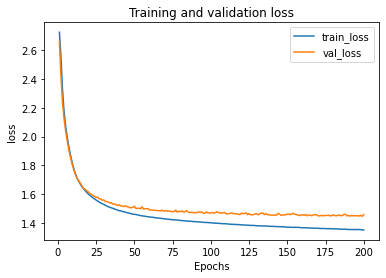

In [ ]:
plot_metric(history1 , 'loss')

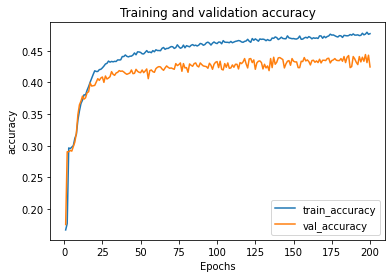

In [ ]:
plot_metric(history1, 'accuracy')

In [ ]:
print(model1.evaluate(X_test, y_test, batch_size=32, verbose=2))
y_pred = model1.predict(X_test)
y_preds = np.round(y_pred)
print(X_test.shape)
#print("Classification Report: \n", classification_report(y_test, y_preds))

74/74 - 0s - loss: 1.4349 - accuracy: 0.4490 - 311ms/epoch - 4ms/step
[1.4348565340042114, 0.44900551438331604]
(2363, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=2698 (22.839%)
Class=10, n=2698 (22.839%)
Class=2, n=2698 (22.839%)
Class=6, n=2698 (22.839%)
Class=8, n=2698 (22.839%)
Class=7, n=2698 (22.839%)
Class=9, n=2698 (22.839%)
Class=4, n=2698 (22.839%)
Class=5, n=2698 (22.839%)
Class=1, n=2698 (22.839%)
Class=3, n=2698 (22.839%)


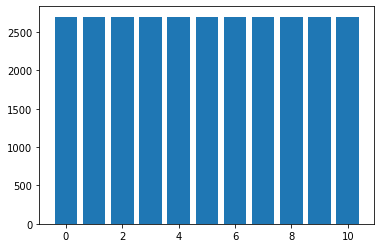

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=3,test_size=0.2)
clf = RobustScaler()
X_train = clf.fit_transform(X_train)
X_test = clf.fit_transform(X_test)
y_train = LabelEncoder().fit_transform(y_train)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
model2 = model_creation(X_train.shape[1])
print(model2.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 16)                240       
                                                                 
 dense_153 (Dense)           (None, 32)                544       
                                                                 
 dense_154 (Dense)           (None, 64)                2112      
                                                                 
 dense_155 (Dense)           (None, 128)               8320      
                                                                 
 dense_156 (Dense)           (None, 256)               33024     
                                                                 
 dense_157 (Dense)           (None, 512)               131584    
                                                                 
 dense_158 (Dense)           (None, 256)             

In [ ]:
model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    metrics = ['accuracy']
)


history2 = model2.fit(X_train, y_train, batch_size=batchsize, epochs=epoch, verbose=2,validation_split=0.20)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


742/742 - 12s - loss: 2.6404 - accuracy: 0.1865 - val_loss: 3.3145 - val_accuracy: 0.0000e+00 - 12s/epoch - 16ms/step
Epoch 2/200
742/742 - 12s - loss: 2.0662 - accuracy: 0.3056 - val_loss: 4.0594 - val_accuracy: 5.0539e-04 - 12s/epoch - 16ms/step
Epoch 3/200
742/742 - 11s - loss: 1.8147 - accuracy: 0.3875 - val_loss: 3.6805 - val_accuracy: 0.0126 - 11s/epoch - 15ms/step
Epoch 4/200
742/742 - 7s - loss: 1.6630 - accuracy: 0.4161 - val_loss: 3.3048 - val_accuracy: 0.0197 - 7s/epoch - 9ms/step
Epoch 5/200
742/742 - 7s - loss: 1.5534 - accuracy: 0.4360 - val_loss: 2.7918 - val_accuracy: 0.0569 - 7s/epoch - 9ms/step
Epoch 6/200
742/742 - 7s - loss: 1.4713 - accuracy: 0.4516 - val_loss: 2.4598 - val_accuracy: 0.1413 - 7s/epoch - 9ms/step
Epoch 7/200
742/742 - 6s - loss: 1.4124 - accuracy: 0.4729 - val_loss: 2.1551 - val_accuracy: 0.3386 - 6s/epoch - 9ms/step
Epoch 8/200
742/742 - 7s - loss: 1.3712 - accuracy: 0.4860 - val_loss: 2.0244 - val_accuracy: 0.3652 - 7s/epoch - 10ms/step
Epoch 9/20

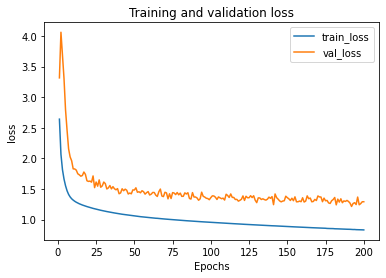

In [ ]:
plot_metric(history2 , 'loss')

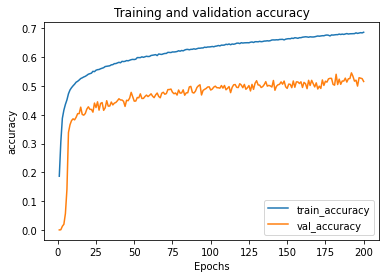

In [ ]:
plot_metric(history2 , 'accuracy')